In [1]:
import numpy as np
import cirq
from cirq import H, CNOT, X
import matplotlib.pyplot as plt

## Flux fusion model on a 3 edge triangular lattice

Quantum circuit model to measure flux fusion, on a triangular lattice. Use group $D_4$ and the conjugacy class $\{ m, mR^{2} \}$. 9 qubits are used to represent the 3 edges and 2 ancillas for the conjugacy class. The circuit prepares the ground state $\sum_g \ket{ggg}$ and multiplies the conjugacy class into two adjacent edges. We would then want to measure charges with a 'classical shadow' protocol.

In [2]:
qubits = cirq.LineQubit.range(11)
g1_m, g1_R2, g1_R, g2_m, g2_R2, g2_R, g3_m, g3_R2, g3_R, x1, x2 = qubits

fusion = cirq.Circuit()

# Prepare ground state
fusion.append([
    H(g1_m),
    H(g1_R2),
    H(g2_R)
])

fusion.append([
    CNOT(g1_m,g2_m),
    CNOT(g1_m,g3_m),
    CNOT(g1_R2,g2_R2),
    CNOT(g1_R2,g3_R2),
    CNOT(g1_R,g2_R),
    CNOT(g1_R,g3_R),
])

# Prepare the ancilla in the superposition of the conjugacy class and multiply onto g1 and g2

fusion.append([
    H(x1),
    H(x2)
])

fusion.append([
    CNOT(x1,g1_R2),
    X(g1_m),

    CNOT(x2,g2_R2),
    X(g2_m)
])

# measure all three qubits

fusion.append(cirq.measure(g1_m, g1_R2, g1_R, g2_m, g2_R2, g2_R, g3_m, g3_R2, g3_R,key='final state'))

print(fusion)

           ┌───┐   ┌────┐
0: ────H────@───────@───────X───M('final state')───
            │       │           │
1: ────H────┼@──────┼@──────X───M──────────────────
            ││      ││      │   │
2: ─────────┼┼@─────┼┼@─────┼───M──────────────────
            │││     │││     │   │
3: ─────────X┼┼─────┼┼┼X────┼───M──────────────────
             ││     │││     │   │
4: ──────────X┼─────┼┼┼X────┼───M──────────────────
              │     ││││    │   │
5: ────H──────X─────┼┼┼┼────┼───M──────────────────
                    ││││    │   │
6: ─────────────────X┼┼┼────┼───M──────────────────
                     │││    │   │
7: ──────────────────X┼┼────┼───M──────────────────
                      ││    │   │
8: ───────────────────X┼────┼───M──────────────────
                       │    │
9: ────H────@──────────┼────@──────────────────────
            │          │
10: ────────X──────────@───────────────────────────
           └───┘   └────┘


/Users/DaanTimmers/anaconda3/lib/python3.7/site-packages/cirq/vis/state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


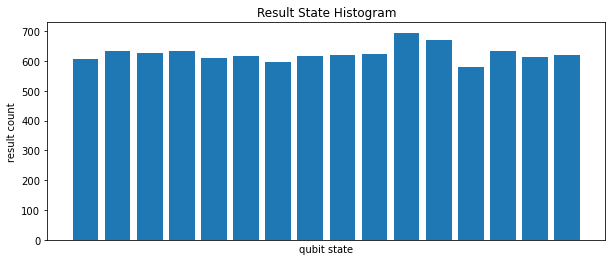

In [44]:
# Run measurement simulation

simulator = cirq.Simulator()
results = simulator.run(fusion,repetitions=10000)

ax = cirq.plot_state_histogram(results.histogram(key='final state'))
ax.get_xaxis().set_ticks([])
plt.gcf().set_size_inches(10, 4)
plt.show(ax)